<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/statistical_analysis/result_analysis/results_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results = pd.read_excel('Dados_Ex2.xlsx')
results.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 501 entries, (nan, nan) to (nan, nan)
Data columns (total 3 columns):
Target        500 non-null float64
Unnamed: 1    0 non-null float64
Resposta      500 non-null float64
dtypes: float64(3)
memory usage: 12.8 KB


In [3]:
results = results.drop(columns=['Unnamed: 1'])
results.reset_index(drop=True,inplace=True)
results.dropna(inplace=True)
results.head()


,Target,Resposta
1,0.0,0.30
2,0.0,0.20
3,1.0,0.28
4,1.0,0.88
5,0.0,0.50


In [0]:
target_positive = results[results['Target'] == 1]
target_negative = results[results['Target'] == 0]

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


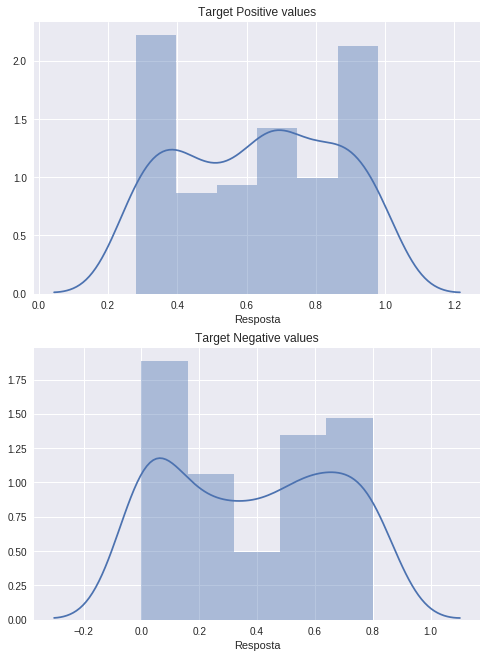

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(8, 11))

ax_1 = sns.distplot(target_positive['Resposta'], ax=ax[0])
ax_1.set_title('Target Positive values')


ax_2 = sns.distplot(target_negative['Resposta'], ax=ax[1])
ax_2.set_title('Target Negative values')

plt.plot()
plt.show()

In [0]:
def get_positive(tresh_hold = 0.5):
  true_positive = target_positive[target_positive['Resposta'] >= tresh_hold]
  false_positive = target_positive[target_positive['Resposta'] < tresh_hold] 
  
  return len(true_positive), len(false_positive)

In [0]:
def get_negative(tresh_hold = 0.5):
  true_negative = target_negative[target_negative['Resposta'] <= tresh_hold]
  false_negative = target_negative[target_negative['Resposta'] > tresh_hold] 
  
  return len(true_negative), len(false_negative)

In [0]:
def calc_stats(true_positive, 
               true_negative, 
               false_positive, 
               false_negative, 
               positives, 
               negatives):
  
  acuracy = (true_positive + true_negative)/ (positives + negatives)

  precision_positive = true_positive / (true_positive + false_positive)
  precision_negative = true_negative / (true_negative + false_negative)

  false_positive_amount = false_positive / negatives
  false_negative_amount = false_negative / positives
  print("Acuracy: "+str(acuracy))
  print("Positive Precision: "+str(precision_positive))
  print("Negative Precision: "+str(precision_negative))
  print("Amount False Positives: "+str(false_positive_amount))
  print("Amount False Negatives: "+str(false_negative_amount))


In [15]:
true_positive, false_positive = get_positive()
true_negative, false_negative = get_negative()

calc_stats(true_positive, 
           true_negative, 
           false_positive, 
           false_negative, 
           len(target_positive), 
           len(target_negative))


Acuracy: 0.642
Positive Precision: 0.6395348837209303
Negative Precision: 0.6446280991735537
Amount False Positives: 0.384297520661157
Amount False Negatives: 0.3333333333333333


In [16]:
true_positive, false_positive = get_positive(0.7)
true_negative, false_negative = get_negative(0.7)

calc_stats(true_positive, 
           true_negative, 
           false_positive, 
           false_negative, 
           len(target_positive), 
           len(target_negative))

Acuracy: 0.604
Positive Precision: 0.3643410852713178
Negative Precision: 0.859504132231405
Amount False Positives: 0.6776859504132231
Amount False Negatives: 0.13178294573643412
